In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import time
import math

In [45]:
crime = pd.read_csv("datalab.csv", index_col = 0)

In [46]:
print(crime.head())

  FechaInicio                                           Delito  \
1  20/12/2019             ROBO A CASA HABITACION SIN VIOLENCIA   
2  20/12/2019                LESIONES INTENCIONALES POR GOLPES   
3  20/12/2019                 DESAPARICION FORZADA DE PERSONAS   
4  20/12/2019  DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL   
5  20/12/2019                               VIOLENCIA FAMILIAR   

                Categoria       Sexo  Edad        CalidadJuridica  FechaHecho  \
1  DELITO DE BAJO IMPACTO  Masculino   NaN  VICTIMA Y DENUNCIANTE  19/12/2019   
2  DELITO DE BAJO IMPACTO  Masculino   NaN  VICTIMA Y DENUNCIANTE  19/12/2019   
3  DELITO DE BAJO IMPACTO  Masculino  36.0                VICTIMA  19/12/2019   
4  DELITO DE BAJO IMPACTO   Femenino   NaN  VICTIMA Y DENUNCIANTE  01/12/2019   
5  DELITO DE BAJO IMPACTO   Femenino  24.0  VICTIMA Y DENUNCIANTE  20/12/2019   

  HoraHecho HoraInicio                      geopoint         AlcaldiaHechos  \
1  16:00:00   03:26:00      19.367423

In [47]:
#Filtering out non-high impact crimes on the area
delitos = crime.Categoria.unique()
print(delitos)
delitos_ai = ['ROBO A REPARTIDOR CON Y SIN VIOLENCIA', 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO','HOMICIDIO DOLOSO', 'ROBO A NEGOCIO CON VIOLENCIA','VIOLACIÓN', 'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA', 'ROBO A CASA HABITACIÓN CON VIOLENCIA', 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA', 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA']


['DELITO DE BAJO IMPACTO' 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA'
 'HECHO NO DELICTIVO'
 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA'
 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA'
 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA'
 'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA' 'VIOLACIÓN'
 'ROBO A REPARTIDOR CON Y SIN VIOLENCIA' 'HOMICIDIO DOLOSO'
 'ROBO A NEGOCIO CON VIOLENCIA'
 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO'
 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA'
 'ROBO A CASA HABITACIÓN CON VIOLENCIA'
 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA' 'SECUESTRO']


In [48]:
crime_sample = 600
crime = crime[crime['Categoria'].isin(delitos_ai)].sample(crime_sample)
print(crime)

       FechaInicio                                          Delito  \
186066  28/02/2019  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
52256   21/05/2019  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
134319  23/12/2019  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
160806  12/12/2019  ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA   
30689   31/01/2019      ROBO A REPARTIDOR Y VEHICULO CON VIOLENCIA   
...            ...                                             ...   
131040  30/04/2019  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
189085  08/06/2019                    ROBO A NEGOCIO CON VIOLENCIA   
7054    16/10/2019                 ROBO A REPARTIDOR CON VIOLENCIA   
62818   30/06/2019  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
50758   08/04/2019  ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   

                                                Categoria       Sexo  Edad  \
186066  ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...  Masculino  54.0   
522

In [49]:
crime_geopoints = crime["geopoint"]

In [50]:
#Getting location data
crime_geopoints = crime_geopoints.str.split(pat=",", n=2, expand=True)
crime_geopoints.columns = ['lon', 'lat']
crime_geopoints = crime_geopoints.astype(float)
print(crime_geopoints)

              lon        lat
186066  19.311628 -99.119703
52256   19.391932 -99.094219
134319  19.424990 -99.125563
160806  19.301946 -99.147150
30689   19.433177 -99.127867
...           ...        ...
131040  19.395715 -99.186537
189085  19.406137 -99.240225
7054    19.387170 -99.034281
62818   19.443984 -99.154918
50758   19.400829 -99.105608

[600 rows x 2 columns]


In [51]:
#Setup of bounds for plotting
margin  = np.array([-70e-4,70e-4,-70e-4,70e-4])
crime_data = np.array([crime_geopoints.lat, crime_geopoints.lon]).reshape(crime_sample*2)
bounds = np.array([crime_geopoints.lat.min(),crime_geopoints.lat.max(),crime_geopoints.lon.min(),crime_geopoints.lon.max()])
bounds += margin
bounds = bounds.round(3)

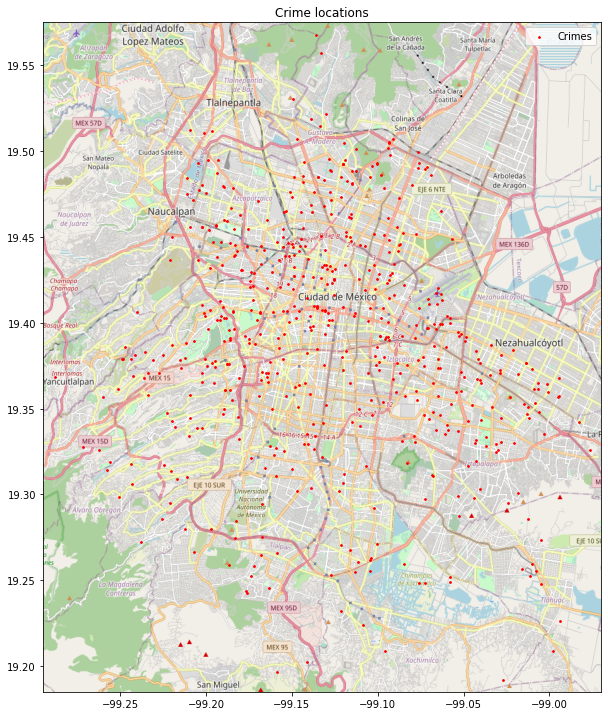

In [52]:
fig, ax = plt.subplots(figsize = (10,15))
cdmx = plt.imread('map_cdmx.png')
ax.scatter(crime_geopoints.lat, crime_geopoints.lon, zorder=1, alpha= 1, c='r', s=3, label = 'Crimes')
ax.set_title('Crime locations')
ax.legend()
ax.set_xlim(bounds[0],bounds[1])
ax.set_ylim(bounds[2],bounds[3])
ax.imshow(cdmx, zorder=0, extent = bounds, aspect= 'equal')
plt.savefig('crimes.png', dpi = 600)

In [53]:
n_cam = 20
cam_loc = np.array([np.random.uniform(bounds[0],bounds[1],n_cam), np.random.uniform(bounds[2],bounds[3],n_cam)]).reshape(2*n_cam)

In [54]:
crime_data_aux = crime_data 
crime_data_aux = crime_data_aux[np.logical_not(np.isnan(crime_data_aux))]
cam_loc_aux = cam_loc

In [55]:
def fcosto(camara_loc):
    n1 = n_cam
    n2 = int(len(crime_data_aux)/2)
    costo = 0
    flag = False
    # for i in range(n1):
    #     for j in range(n2):
    #         costo += math.sqrt((camara_loc[i]-crime_data_aux[j])**2 + (camara_loc[n1+i]-crime_data_aux[n2+j])**2
        # for k in range(n1):
        #     if i!=k:
        #         costo += 1/math.sqrt((camara_loc[i]-camara_loc[k])**2+(camara_loc[i+n1]-camara_loc[k+n1])**2)/3
    return (costo)

In [56]:
def fcosto(camara_loc):
    n1 = n_cam
    n2 = int(len(crime_data_aux)/2)
    costo = 0
    flag = False
    for i in range(n1):
        for j in range(n2):
            costo += math.sqrt((camara_loc[i]-crime_data_aux[j])**2 + (camara_loc[n1+i]-crime_data_aux[n2+j])**2)
        for k in range(n1):
            if i!=k:
                costo += 1/math.sqrt((camara_loc[i]-camara_loc[k])**2+(camara_loc[i+n1]-camara_loc[k+n1])**2)/3
    return costo


In [57]:
crime_data = np.array(crime_geopoints).reshape(2*crime_sample)

In [58]:
optimal_loc = optimize.minimize(fcosto, cam_loc_aux, method = 'BFGS', tol= 10e-2)

In [59]:

print(optimal_loc.x)


[-99.19988147 -99.04988445 -99.08183325 -99.26362709 -98.99829665
 -99.07918867 -99.23864977 -99.1938626  -99.11327487 -99.1954976
 -99.0488201  -98.98373971 -99.1795808  -99.14289272 -99.12057831
 -99.15645422 -99.09898606 -99.01779395 -99.13029536 -99.26527027
  19.51497377  19.50376321  19.31765772  19.45643873  19.44248228
  19.43583047  19.30683373  19.37477242  19.37132455  19.44221981
  19.37899676  19.35953021  19.25338195  19.41688023  19.54383217
  19.32211274  19.24688351  19.28607209  19.47666109  19.37703709]


In [60]:
optimal_loc = np.array(optimal_loc.x).reshape((2,n_cam))

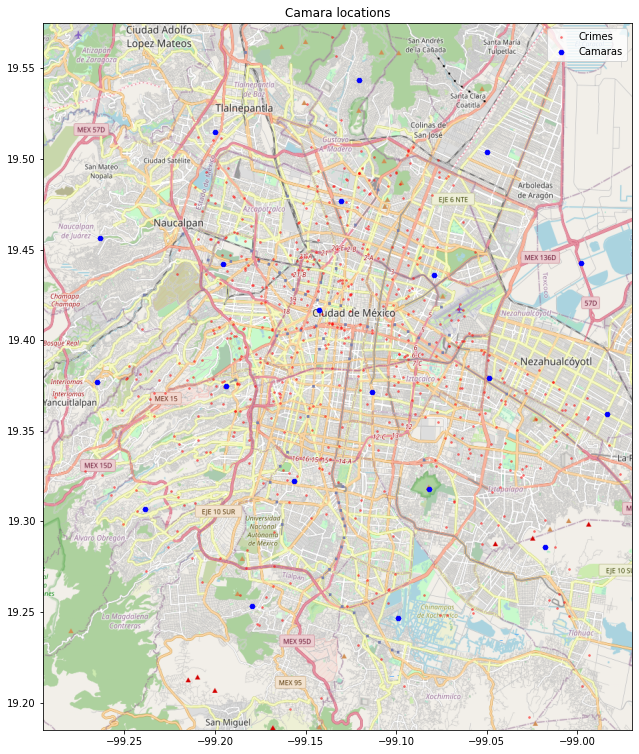

In [61]:
fig, ax = plt.subplots(figsize = (14,13))
cdmx = plt.imread('map_cdmx.png')
ax.scatter(crime_geopoints.lat, crime_geopoints.lon, zorder=1, alpha= 0.4, c='r', s=3, label = 'Crimes')
ax.scatter(optimal_loc[0],optimal_loc[1], zorder = 2, alpha = 1, c = 'b', s = 25, marker = 'H', label = 'Camaras')
ax.set_title('Camara locations')
ax.set_xlim(bounds[0],bounds[1])
ax.set_ylim(bounds[2],bounds[3])
ax.legend()
ax.imshow(cdmx, zorder = 0, extent = bounds, aspect = 'equal')
plt.savefig('Camara locations', dpi = 600)

In [62]:
optimal_loc = pd.DataFrame(optimal_loc.T, columns = ['Latitude', 'Longitude'])
optimal_loc.to_csv('Optimal camara locations')